In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ELU, ReLU, GaussianNoise, Softmax
from keras.optimizers import SGD, Adam
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard
from keras.losses import MeanSquaredError, CategoricalCrossentropy

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10, 8

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision: {precision_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'Recall   : {recall_score(y_true, y_pred, average = "macro"):.2f}')
    print(f'F1-score : {f1_score(y_true, y_pred, average = "macro"):.2f}')

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


## Exploring dataset a bit

Load the dataset

In [4]:
wine = load_wine()
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
X = wine.data
Y = wine.target
print(X.shape, Y.shape)

(178, 13) (178,)


Histogram of target values

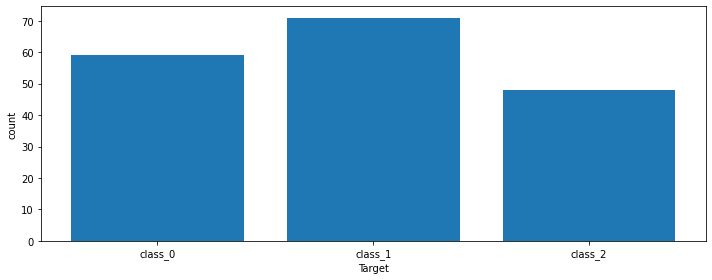

In [6]:
rcParams['figure.figsize'] = 10, 4
plt.bar(wine.target_names, np.unique(Y, return_counts = True)[1])
plt.xlabel('Target')
plt.ylabel('count')
plt.tight_layout()

## Scaling and Train, Test, Valid split

In [7]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Y = Y[:,np.newaxis]
scaler.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [8]:
ohe = OneHotEncoder().fit(Y)
Ys = ohe.transform(Y)
Ys.shape

(178, 3)

In [9]:
x_train, x_test,  y_train, y_test  = train_test_split(Xs, Ys, test_size = 0.33)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.5)
print(f'Train = {x_train.shape}, {y_train.shape}')
print(f'Valid = {x_valid.shape}, {y_valid.shape}')
print(f'Test  = {x_test.shape}, {y_test.shape}')

Train = (59, 13), (59, 3)
Valid = (60, 13), (60, 3)
Test  = (59, 13), (59, 3)


## Simple Neural Network

In [10]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = Xs.shape[1], name = 'dense1'))
model.add(ReLU())
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 10)                0         
_________________________________________________________________
output (Dense)               (None, 3)                 33        
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [12]:
log = model.fit(x_train, y_train,
    batch_size = 127,
    epochs = 250,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/250
 - 0s - loss: 1.5739 - accuracy: 0.1356 - val_loss: 1.6991 - val_accuracy: 0.0833
Epoch 2/250
 - 0s - loss: 1.5558 - accuracy: 0.1356 - val_loss: 1.6824 - val_accuracy: 0.0833
Epoch 3/250
 - 0s - loss: 1.5377 - accuracy: 0.1356 - val_loss: 1.6658 - val_accuracy: 0.0833
Epoch 4/250
 - 0s - loss: 1.5195 - accuracy: 0.1356 - val_loss: 1.6496 - val_accuracy: 0.0833
Epoch 5/250
 - 0s - loss: 1.5019 - accuracy: 0.1356 - val_loss: 1.6337 - val_accuracy: 0.1000
Epoch 6/250
 - 0s - loss: 1.4849 - accuracy: 0.1356 - val_loss: 1.6180 - val_accuracy: 0.1000
Epoch 7/250
 - 0s - loss: 1.4683 - accuracy: 0.1356 - val_loss: 1.6027 - val_accuracy: 0.1000
Epoch 8/250
 - 0s - loss: 1.4522 - accuracy: 0.1525 - val_loss: 1.5878 - val_accuracy: 0.1000
Epoch 9/250
 - 0s - loss: 1.4365 - accuracy: 0.1695 - val_loss: 1.5732 - val_accuracy: 0.1000
Epoch 10/250
 - 0s - loss: 1.4211 - accuracy: 0.1864 - val_loss: 1.5589 - val_accuracy: 0.1000
Epoch 11/250
 -

Epoch 87/250
 - 0s - loss: 0.8006 - accuracy: 0.7119 - val_loss: 0.9213 - val_accuracy: 0.6333
Epoch 88/250
 - 0s - loss: 0.7954 - accuracy: 0.7119 - val_loss: 0.9158 - val_accuracy: 0.6333
Epoch 89/250
 - 0s - loss: 0.7903 - accuracy: 0.7119 - val_loss: 0.9104 - val_accuracy: 0.6333
Epoch 90/250
 - 0s - loss: 0.7853 - accuracy: 0.7119 - val_loss: 0.9050 - val_accuracy: 0.6333
Epoch 91/250
 - 0s - loss: 0.7803 - accuracy: 0.7119 - val_loss: 0.8998 - val_accuracy: 0.6333
Epoch 92/250
 - 0s - loss: 0.7753 - accuracy: 0.7288 - val_loss: 0.8945 - val_accuracy: 0.6333
Epoch 93/250
 - 0s - loss: 0.7704 - accuracy: 0.7288 - val_loss: 0.8894 - val_accuracy: 0.6333
Epoch 94/250
 - 0s - loss: 0.7656 - accuracy: 0.7288 - val_loss: 0.8843 - val_accuracy: 0.6333
Epoch 95/250
 - 0s - loss: 0.7608 - accuracy: 0.7288 - val_loss: 0.8793 - val_accuracy: 0.6333
Epoch 96/250
 - 0s - loss: 0.7560 - accuracy: 0.7288 - val_loss: 0.8743 - val_accuracy: 0.6333
Epoch 97/250
 - 0s - loss: 0.7513 - accuracy: 0.72

Epoch 173/250
 - 0s - loss: 0.4512 - accuracy: 0.9322 - val_loss: 0.5711 - val_accuracy: 0.8667
Epoch 174/250
 - 0s - loss: 0.4484 - accuracy: 0.9322 - val_loss: 0.5682 - val_accuracy: 0.8667
Epoch 175/250
 - 0s - loss: 0.4456 - accuracy: 0.9322 - val_loss: 0.5654 - val_accuracy: 0.8667
Epoch 176/250
 - 0s - loss: 0.4428 - accuracy: 0.9322 - val_loss: 0.5625 - val_accuracy: 0.8667
Epoch 177/250
 - 0s - loss: 0.4401 - accuracy: 0.9322 - val_loss: 0.5598 - val_accuracy: 0.8667
Epoch 178/250
 - 0s - loss: 0.4374 - accuracy: 0.9322 - val_loss: 0.5570 - val_accuracy: 0.8667
Epoch 179/250
 - 0s - loss: 0.4347 - accuracy: 0.9322 - val_loss: 0.5543 - val_accuracy: 0.8667
Epoch 180/250
 - 0s - loss: 0.4321 - accuracy: 0.9322 - val_loss: 0.5516 - val_accuracy: 0.8667
Epoch 181/250
 - 0s - loss: 0.4295 - accuracy: 0.9322 - val_loss: 0.5489 - val_accuracy: 0.8833
Epoch 182/250
 - 0s - loss: 0.4269 - accuracy: 0.9322 - val_loss: 0.5463 - val_accuracy: 0.8833
Epoch 183/250
 - 0s - loss: 0.4244 - acc

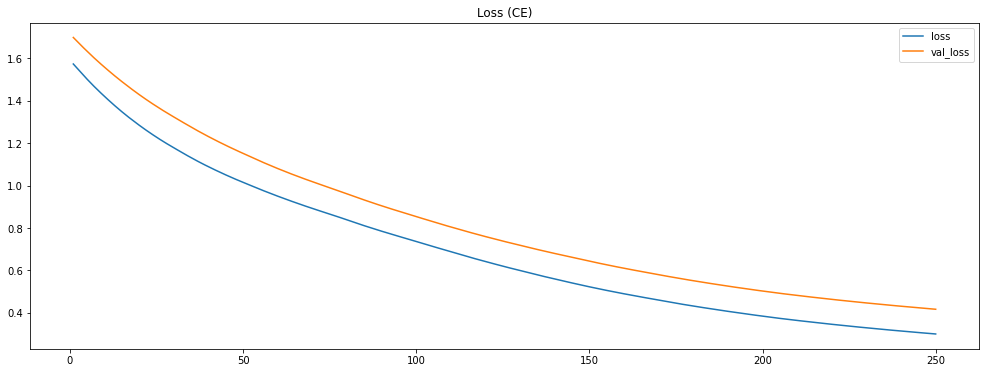

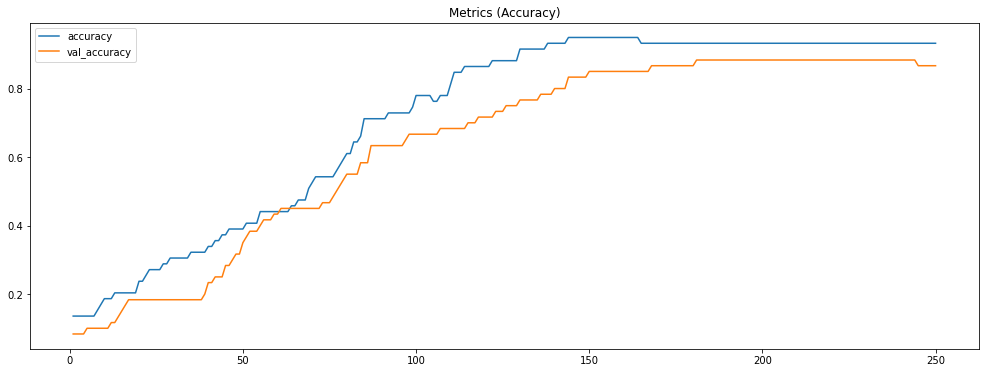

In [13]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [14]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 0.93
Precision: 0.93
Recall   : 0.94
F1-score : 0.93

Valid set:
Accuracy : 0.87
Precision: 0.87
Recall   : 0.87
F1-score : 0.87

Test set:
Accuracy : 0.93
Precision: 0.93
Recall   : 0.95
F1-score : 0.93


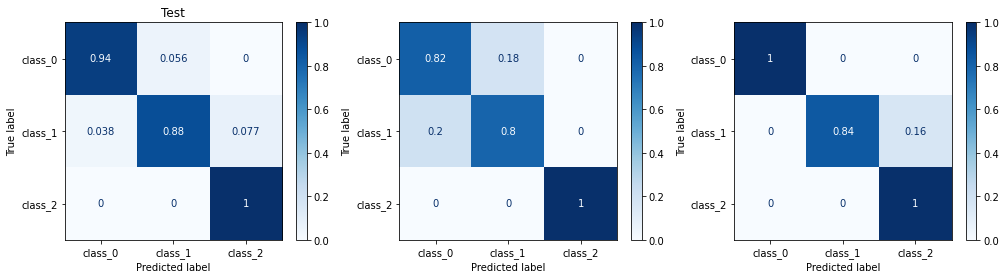

In [15]:
def print_conf_matrix(y_true, y_pred, labels, ax, title):
    disp = ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(y_true, y_pred,normalize = 'true'), display_labels = labels)
    disp.plot(include_values = True, cmap = plt.cm.Blues, ax = ax)
    ax1.set_title(title)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')

plt.show()

## Increase complexity

In [16]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)              

In [17]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])

In [18]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 1000,
    verbose = 2,
    validation_data=(x_valid, y_valid)
)

Train on 59 samples, validate on 60 samples
Epoch 1/1000
 - 0s - loss: 1.2186 - accuracy: 0.4407 - val_loss: 0.9223 - val_accuracy: 0.5667
Epoch 2/1000
 - 0s - loss: 1.3697 - accuracy: 0.4068 - val_loss: 0.8996 - val_accuracy: 0.5667
Epoch 3/1000
 - 0s - loss: 1.3624 - accuracy: 0.4746 - val_loss: 0.8786 - val_accuracy: 0.5833
Epoch 4/1000
 - 0s - loss: 1.1598 - accuracy: 0.5593 - val_loss: 0.8610 - val_accuracy: 0.6167
Epoch 5/1000
 - 0s - loss: 1.4747 - accuracy: 0.3390 - val_loss: 0.8445 - val_accuracy: 0.6167
Epoch 6/1000
 - 0s - loss: 1.3784 - accuracy: 0.4576 - val_loss: 0.8251 - val_accuracy: 0.6167
Epoch 7/1000
 - 0s - loss: 1.0477 - accuracy: 0.5763 - val_loss: 0.8153 - val_accuracy: 0.6500
Epoch 8/1000
 - 0s - loss: 0.9713 - accuracy: 0.5593 - val_loss: 0.8042 - val_accuracy: 0.6500
Epoch 9/1000
 - 0s - loss: 0.8265 - accuracy: 0.5932 - val_loss: 0.7954 - val_accuracy: 0.6667
Epoch 10/1000
 - 0s - loss: 1.0870 - accuracy: 0.6102 - val_loss: 0.7830 - val_accuracy: 0.6833
Epoch

Epoch 86/1000
 - 0s - loss: 0.5599 - accuracy: 0.7458 - val_loss: 0.4583 - val_accuracy: 0.8500
Epoch 87/1000
 - 0s - loss: 0.6008 - accuracy: 0.7119 - val_loss: 0.4563 - val_accuracy: 0.8500
Epoch 88/1000
 - 0s - loss: 0.6795 - accuracy: 0.7119 - val_loss: 0.4559 - val_accuracy: 0.8500
Epoch 89/1000
 - 0s - loss: 0.5600 - accuracy: 0.7458 - val_loss: 0.4525 - val_accuracy: 0.8500
Epoch 90/1000
 - 0s - loss: 0.7422 - accuracy: 0.6610 - val_loss: 0.4506 - val_accuracy: 0.8667
Epoch 91/1000
 - 0s - loss: 0.5593 - accuracy: 0.7288 - val_loss: 0.4478 - val_accuracy: 0.8667
Epoch 92/1000
 - 0s - loss: 0.5620 - accuracy: 0.7797 - val_loss: 0.4453 - val_accuracy: 0.8667
Epoch 93/1000
 - 0s - loss: 0.6863 - accuracy: 0.7458 - val_loss: 0.4440 - val_accuracy: 0.8667
Epoch 94/1000
 - 0s - loss: 0.4020 - accuracy: 0.8814 - val_loss: 0.4409 - val_accuracy: 0.8667
Epoch 95/1000
 - 0s - loss: 0.6610 - accuracy: 0.7119 - val_loss: 0.4386 - val_accuracy: 0.8667
Epoch 96/1000
 - 0s - loss: 0.6943 - acc

Epoch 171/1000
 - 0s - loss: 0.6006 - accuracy: 0.6949 - val_loss: 0.3332 - val_accuracy: 0.9000
Epoch 172/1000
 - 0s - loss: 0.4492 - accuracy: 0.8475 - val_loss: 0.3319 - val_accuracy: 0.9000
Epoch 173/1000
 - 0s - loss: 0.5153 - accuracy: 0.7288 - val_loss: 0.3308 - val_accuracy: 0.8833
Epoch 174/1000
 - 0s - loss: 0.4924 - accuracy: 0.8475 - val_loss: 0.3315 - val_accuracy: 0.9000
Epoch 175/1000
 - 0s - loss: 0.5024 - accuracy: 0.7966 - val_loss: 0.3313 - val_accuracy: 0.9000
Epoch 176/1000
 - 0s - loss: 0.5039 - accuracy: 0.7797 - val_loss: 0.3299 - val_accuracy: 0.9000
Epoch 177/1000
 - 0s - loss: 0.4783 - accuracy: 0.8305 - val_loss: 0.3282 - val_accuracy: 0.8833
Epoch 178/1000
 - 0s - loss: 0.4039 - accuracy: 0.8475 - val_loss: 0.3275 - val_accuracy: 0.9000
Epoch 179/1000
 - 0s - loss: 0.6052 - accuracy: 0.7458 - val_loss: 0.3287 - val_accuracy: 0.9000
Epoch 180/1000
 - 0s - loss: 0.5980 - accuracy: 0.7119 - val_loss: 0.3285 - val_accuracy: 0.9000
Epoch 181/1000
 - 0s - loss: 0

Epoch 256/1000
 - 0s - loss: 0.4419 - accuracy: 0.8475 - val_loss: 0.2638 - val_accuracy: 0.9167
Epoch 257/1000
 - 0s - loss: 0.5031 - accuracy: 0.7288 - val_loss: 0.2634 - val_accuracy: 0.9167
Epoch 258/1000
 - 0s - loss: 0.2950 - accuracy: 0.8983 - val_loss: 0.2623 - val_accuracy: 0.9167
Epoch 259/1000
 - 0s - loss: 0.3647 - accuracy: 0.8475 - val_loss: 0.2618 - val_accuracy: 0.9167
Epoch 260/1000
 - 0s - loss: 0.3646 - accuracy: 0.8644 - val_loss: 0.2611 - val_accuracy: 0.9167
Epoch 261/1000
 - 0s - loss: 0.4183 - accuracy: 0.8475 - val_loss: 0.2604 - val_accuracy: 0.9167
Epoch 262/1000
 - 0s - loss: 0.4319 - accuracy: 0.7966 - val_loss: 0.2599 - val_accuracy: 0.9167
Epoch 263/1000
 - 0s - loss: 0.4592 - accuracy: 0.7966 - val_loss: 0.2588 - val_accuracy: 0.9167
Epoch 264/1000
 - 0s - loss: 0.3753 - accuracy: 0.8814 - val_loss: 0.2585 - val_accuracy: 0.9167
Epoch 265/1000
 - 0s - loss: 0.3674 - accuracy: 0.8814 - val_loss: 0.2584 - val_accuracy: 0.9167
Epoch 266/1000
 - 0s - loss: 0

Epoch 341/1000
 - 0s - loss: 0.3726 - accuracy: 0.8644 - val_loss: 0.2227 - val_accuracy: 0.9167
Epoch 342/1000
 - 0s - loss: 0.4355 - accuracy: 0.7966 - val_loss: 0.2214 - val_accuracy: 0.9167
Epoch 343/1000
 - 0s - loss: 0.4225 - accuracy: 0.8475 - val_loss: 0.2217 - val_accuracy: 0.9167
Epoch 344/1000
 - 0s - loss: 0.2877 - accuracy: 0.9492 - val_loss: 0.2213 - val_accuracy: 0.9167
Epoch 345/1000
 - 0s - loss: 0.4254 - accuracy: 0.7966 - val_loss: 0.2211 - val_accuracy: 0.9167
Epoch 346/1000
 - 0s - loss: 0.3725 - accuracy: 0.8136 - val_loss: 0.2206 - val_accuracy: 0.9167
Epoch 347/1000
 - 0s - loss: 0.3585 - accuracy: 0.8475 - val_loss: 0.2203 - val_accuracy: 0.9167
Epoch 348/1000
 - 0s - loss: 0.3542 - accuracy: 0.8644 - val_loss: 0.2199 - val_accuracy: 0.9167
Epoch 349/1000
 - 0s - loss: 0.4142 - accuracy: 0.8475 - val_loss: 0.2198 - val_accuracy: 0.9167
Epoch 350/1000
 - 0s - loss: 0.4646 - accuracy: 0.7458 - val_loss: 0.2193 - val_accuracy: 0.9167
Epoch 351/1000
 - 0s - loss: 0

Epoch 426/1000
 - 0s - loss: 0.2803 - accuracy: 0.8983 - val_loss: 0.1987 - val_accuracy: 0.9167
Epoch 427/1000
 - 0s - loss: 0.3491 - accuracy: 0.8475 - val_loss: 0.1977 - val_accuracy: 0.9167
Epoch 428/1000
 - 0s - loss: 0.3849 - accuracy: 0.8136 - val_loss: 0.1977 - val_accuracy: 0.9167
Epoch 429/1000
 - 0s - loss: 0.3051 - accuracy: 0.8475 - val_loss: 0.1970 - val_accuracy: 0.9167
Epoch 430/1000
 - 0s - loss: 0.3372 - accuracy: 0.8136 - val_loss: 0.1970 - val_accuracy: 0.9167
Epoch 431/1000
 - 0s - loss: 0.3885 - accuracy: 0.8475 - val_loss: 0.1962 - val_accuracy: 0.9167
Epoch 432/1000
 - 0s - loss: 0.2956 - accuracy: 0.9153 - val_loss: 0.1969 - val_accuracy: 0.9167
Epoch 433/1000
 - 0s - loss: 0.2667 - accuracy: 0.9322 - val_loss: 0.1962 - val_accuracy: 0.9167
Epoch 434/1000
 - 0s - loss: 0.3393 - accuracy: 0.7797 - val_loss: 0.1960 - val_accuracy: 0.9167
Epoch 435/1000
 - 0s - loss: 0.3714 - accuracy: 0.7797 - val_loss: 0.1967 - val_accuracy: 0.9167
Epoch 436/1000
 - 0s - loss: 0

Epoch 511/1000
 - 0s - loss: 0.2498 - accuracy: 0.9153 - val_loss: 0.1811 - val_accuracy: 0.9167
Epoch 512/1000
 - 0s - loss: 0.3355 - accuracy: 0.8305 - val_loss: 0.1803 - val_accuracy: 0.9167
Epoch 513/1000
 - 0s - loss: 0.2780 - accuracy: 0.8983 - val_loss: 0.1805 - val_accuracy: 0.9167
Epoch 514/1000
 - 0s - loss: 0.3797 - accuracy: 0.8136 - val_loss: 0.1811 - val_accuracy: 0.9167
Epoch 515/1000
 - 0s - loss: 0.2872 - accuracy: 0.8475 - val_loss: 0.1811 - val_accuracy: 0.9167
Epoch 516/1000
 - 0s - loss: 0.3764 - accuracy: 0.8305 - val_loss: 0.1810 - val_accuracy: 0.9167
Epoch 517/1000
 - 0s - loss: 0.3928 - accuracy: 0.8305 - val_loss: 0.1805 - val_accuracy: 0.9167
Epoch 518/1000
 - 0s - loss: 0.2939 - accuracy: 0.8983 - val_loss: 0.1806 - val_accuracy: 0.9167
Epoch 519/1000
 - 0s - loss: 0.3307 - accuracy: 0.8305 - val_loss: 0.1796 - val_accuracy: 0.9167
Epoch 520/1000
 - 0s - loss: 0.2589 - accuracy: 0.8983 - val_loss: 0.1802 - val_accuracy: 0.9167
Epoch 521/1000
 - 0s - loss: 0

Epoch 596/1000
 - 0s - loss: 0.2968 - accuracy: 0.8983 - val_loss: 0.1676 - val_accuracy: 0.9333
Epoch 597/1000
 - 0s - loss: 0.3748 - accuracy: 0.8983 - val_loss: 0.1676 - val_accuracy: 0.9333
Epoch 598/1000
 - 0s - loss: 0.2487 - accuracy: 0.9153 - val_loss: 0.1671 - val_accuracy: 0.9333
Epoch 599/1000
 - 0s - loss: 0.2420 - accuracy: 0.9322 - val_loss: 0.1669 - val_accuracy: 0.9333
Epoch 600/1000
 - 0s - loss: 0.3469 - accuracy: 0.8814 - val_loss: 0.1668 - val_accuracy: 0.9333
Epoch 601/1000
 - 0s - loss: 0.2260 - accuracy: 0.8983 - val_loss: 0.1667 - val_accuracy: 0.9333
Epoch 602/1000
 - 0s - loss: 0.3181 - accuracy: 0.8814 - val_loss: 0.1666 - val_accuracy: 0.9333
Epoch 603/1000
 - 0s - loss: 0.3440 - accuracy: 0.8644 - val_loss: 0.1662 - val_accuracy: 0.9333
Epoch 604/1000
 - 0s - loss: 0.2896 - accuracy: 0.8983 - val_loss: 0.1662 - val_accuracy: 0.9333
Epoch 605/1000
 - 0s - loss: 0.2982 - accuracy: 0.9492 - val_loss: 0.1663 - val_accuracy: 0.9333
Epoch 606/1000
 - 0s - loss: 0

Epoch 681/1000
 - 0s - loss: 0.2481 - accuracy: 0.9153 - val_loss: 0.1533 - val_accuracy: 0.9333
Epoch 682/1000
 - 0s - loss: 0.3532 - accuracy: 0.8305 - val_loss: 0.1533 - val_accuracy: 0.9333
Epoch 683/1000
 - 0s - loss: 0.2088 - accuracy: 0.9492 - val_loss: 0.1536 - val_accuracy: 0.9333
Epoch 684/1000
 - 0s - loss: 0.1593 - accuracy: 0.9322 - val_loss: 0.1534 - val_accuracy: 0.9333
Epoch 685/1000
 - 0s - loss: 0.1930 - accuracy: 0.9153 - val_loss: 0.1536 - val_accuracy: 0.9333
Epoch 686/1000
 - 0s - loss: 0.2865 - accuracy: 0.8983 - val_loss: 0.1535 - val_accuracy: 0.9333
Epoch 687/1000
 - 0s - loss: 0.2216 - accuracy: 0.8983 - val_loss: 0.1526 - val_accuracy: 0.9333
Epoch 688/1000
 - 0s - loss: 0.1760 - accuracy: 0.9492 - val_loss: 0.1523 - val_accuracy: 0.9333
Epoch 689/1000
 - 0s - loss: 0.1620 - accuracy: 0.9831 - val_loss: 0.1521 - val_accuracy: 0.9333
Epoch 690/1000
 - 0s - loss: 0.2237 - accuracy: 0.9153 - val_loss: 0.1521 - val_accuracy: 0.9333
Epoch 691/1000
 - 0s - loss: 0

Epoch 766/1000
 - 0s - loss: 0.3093 - accuracy: 0.8644 - val_loss: 0.1507 - val_accuracy: 0.9333
Epoch 767/1000
 - 0s - loss: 0.2305 - accuracy: 0.8814 - val_loss: 0.1512 - val_accuracy: 0.9333
Epoch 768/1000
 - 0s - loss: 0.1685 - accuracy: 0.9322 - val_loss: 0.1511 - val_accuracy: 0.9333
Epoch 769/1000
 - 0s - loss: 0.2092 - accuracy: 0.8983 - val_loss: 0.1507 - val_accuracy: 0.9333
Epoch 770/1000
 - 0s - loss: 0.3237 - accuracy: 0.8475 - val_loss: 0.1510 - val_accuracy: 0.9333
Epoch 771/1000
 - 0s - loss: 0.2714 - accuracy: 0.9492 - val_loss: 0.1510 - val_accuracy: 0.9333
Epoch 772/1000
 - 0s - loss: 0.1998 - accuracy: 0.9322 - val_loss: 0.1504 - val_accuracy: 0.9333
Epoch 773/1000
 - 0s - loss: 0.2925 - accuracy: 0.8983 - val_loss: 0.1493 - val_accuracy: 0.9333
Epoch 774/1000
 - 0s - loss: 0.1905 - accuracy: 0.9322 - val_loss: 0.1495 - val_accuracy: 0.9333
Epoch 775/1000
 - 0s - loss: 0.2668 - accuracy: 0.8983 - val_loss: 0.1491 - val_accuracy: 0.9333
Epoch 776/1000
 - 0s - loss: 0

Epoch 851/1000
 - 0s - loss: 0.1959 - accuracy: 0.9322 - val_loss: 0.1407 - val_accuracy: 0.9333
Epoch 852/1000
 - 0s - loss: 0.1853 - accuracy: 0.9661 - val_loss: 0.1405 - val_accuracy: 0.9333
Epoch 853/1000
 - 0s - loss: 0.2218 - accuracy: 0.9492 - val_loss: 0.1404 - val_accuracy: 0.9333
Epoch 854/1000
 - 0s - loss: 0.2431 - accuracy: 0.8814 - val_loss: 0.1403 - val_accuracy: 0.9333
Epoch 855/1000
 - 0s - loss: 0.3311 - accuracy: 0.8644 - val_loss: 0.1403 - val_accuracy: 0.9333
Epoch 856/1000
 - 0s - loss: 0.2978 - accuracy: 0.8644 - val_loss: 0.1397 - val_accuracy: 0.9333
Epoch 857/1000
 - 0s - loss: 0.2113 - accuracy: 0.8983 - val_loss: 0.1398 - val_accuracy: 0.9333
Epoch 858/1000
 - 0s - loss: 0.2756 - accuracy: 0.8644 - val_loss: 0.1396 - val_accuracy: 0.9333
Epoch 859/1000
 - 0s - loss: 0.2018 - accuracy: 0.9661 - val_loss: 0.1393 - val_accuracy: 0.9333
Epoch 860/1000
 - 0s - loss: 0.2247 - accuracy: 0.9153 - val_loss: 0.1386 - val_accuracy: 0.9333
Epoch 861/1000
 - 0s - loss: 0

Epoch 936/1000
 - 0s - loss: 0.1919 - accuracy: 0.9322 - val_loss: 0.1368 - val_accuracy: 0.9333
Epoch 937/1000
 - 0s - loss: 0.1750 - accuracy: 0.9492 - val_loss: 0.1368 - val_accuracy: 0.9333
Epoch 938/1000
 - 0s - loss: 0.1428 - accuracy: 0.9322 - val_loss: 0.1368 - val_accuracy: 0.9333
Epoch 939/1000
 - 0s - loss: 0.2310 - accuracy: 0.9153 - val_loss: 0.1364 - val_accuracy: 0.9333
Epoch 940/1000
 - 0s - loss: 0.1724 - accuracy: 0.9492 - val_loss: 0.1362 - val_accuracy: 0.9333
Epoch 941/1000
 - 0s - loss: 0.1950 - accuracy: 0.9492 - val_loss: 0.1366 - val_accuracy: 0.9333
Epoch 942/1000
 - 0s - loss: 0.2576 - accuracy: 0.9153 - val_loss: 0.1378 - val_accuracy: 0.9333
Epoch 943/1000
 - 0s - loss: 0.1594 - accuracy: 0.9492 - val_loss: 0.1377 - val_accuracy: 0.9333
Epoch 944/1000
 - 0s - loss: 0.3069 - accuracy: 0.7966 - val_loss: 0.1374 - val_accuracy: 0.9333
Epoch 945/1000
 - 0s - loss: 0.2599 - accuracy: 0.8983 - val_loss: 0.1372 - val_accuracy: 0.9333
Epoch 946/1000
 - 0s - loss: 0

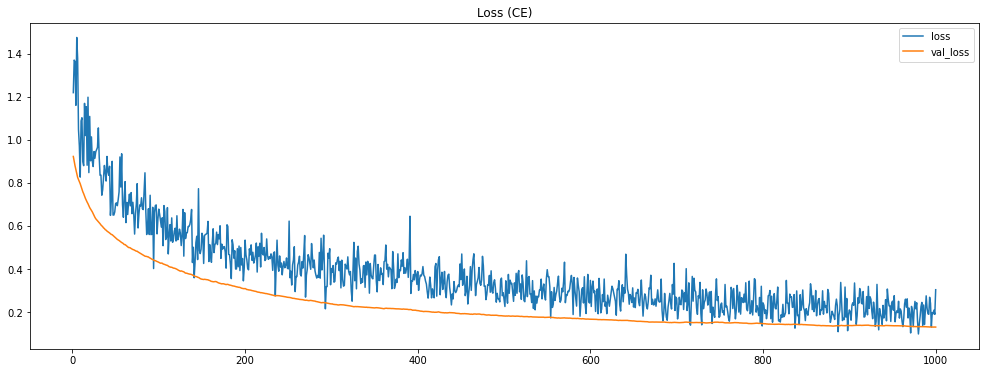

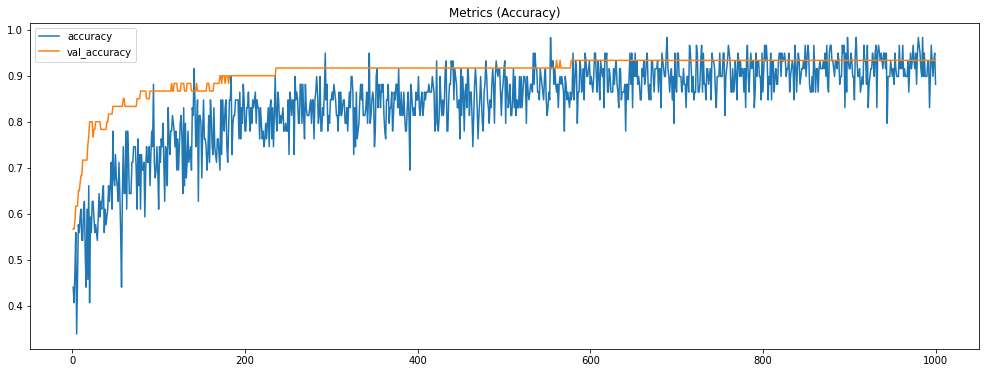

In [19]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [20]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 0.93
Precision: 0.94
Recall   : 0.94
F1-score : 0.93

Test set:
Accuracy : 0.98
Precision: 0.98
Recall   : 0.99
F1-score : 0.98


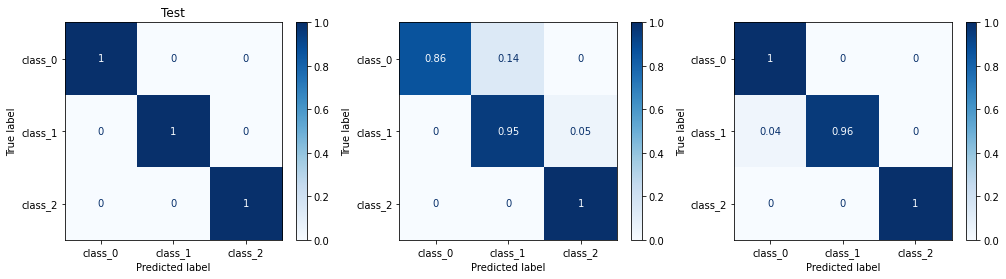

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()

## Early stop

In [22]:
model = Sequential(name="Classifier NN")

model.add(Dense(10, input_dim = X.shape[1], name = 'dense1'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(10, name = 'dense2'))
model.add(LeakyReLU())
model.add(Dropout(0.5))
model.add(GaussianNoise(0.1))
model.add(Dense(Ys.shape[1], name = 'output'))
model.add(Softmax())

model.summary()

Model: "Classifier NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 10)                140       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
gaussian_noise_3 (GaussianNo (None, 10)                0         
_________________________________________________________________
dense2 (Dense)               (None, 10)                110       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)              

In [23]:
model.compile(loss = CategoricalCrossentropy(), optimizer = SGD(), metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 50, verbose = 1, restore_best_weights = True)

In [24]:
log = model.fit(x_train, y_train,
    batch_size = 32,
    epochs = 10000,
    verbose = 2,
    validation_data=(x_valid, y_valid),
    callbacks = [ es ]
)

Train on 59 samples, validate on 60 samples
Epoch 1/10000
 - 0s - loss: 2.0408 - accuracy: 0.0847 - val_loss: 1.6272 - val_accuracy: 0.2000
Epoch 2/10000
 - 0s - loss: 1.5755 - accuracy: 0.2881 - val_loss: 1.5812 - val_accuracy: 0.2000
Epoch 3/10000
 - 0s - loss: 1.9447 - accuracy: 0.3051 - val_loss: 1.5213 - val_accuracy: 0.2000
Epoch 4/10000
 - 0s - loss: 1.8536 - accuracy: 0.2881 - val_loss: 1.4678 - val_accuracy: 0.2000
Epoch 5/10000
 - 0s - loss: 1.7331 - accuracy: 0.2712 - val_loss: 1.4195 - val_accuracy: 0.1667
Epoch 6/10000
 - 0s - loss: 1.6293 - accuracy: 0.2034 - val_loss: 1.3787 - val_accuracy: 0.1667
Epoch 7/10000
 - 0s - loss: 1.7244 - accuracy: 0.2373 - val_loss: 1.3387 - val_accuracy: 0.1667
Epoch 8/10000
 - 0s - loss: 1.4259 - accuracy: 0.3390 - val_loss: 1.3085 - val_accuracy: 0.1667
Epoch 9/10000
 - 0s - loss: 1.7548 - accuracy: 0.2542 - val_loss: 1.2654 - val_accuracy: 0.1667
Epoch 10/10000
 - 0s - loss: 1.5996 - accuracy: 0.2203 - val_loss: 1.2320 - val_accuracy: 0.

 - 0s - loss: 0.7805 - accuracy: 0.7119 - val_loss: 0.7127 - val_accuracy: 0.8167
Epoch 86/10000
 - 0s - loss: 0.8523 - accuracy: 0.6271 - val_loss: 0.7104 - val_accuracy: 0.8167
Epoch 87/10000
 - 0s - loss: 0.8214 - accuracy: 0.5763 - val_loss: 0.7073 - val_accuracy: 0.8167
Epoch 88/10000
 - 0s - loss: 0.8399 - accuracy: 0.5593 - val_loss: 0.7038 - val_accuracy: 0.8167
Epoch 89/10000
 - 0s - loss: 0.7746 - accuracy: 0.7458 - val_loss: 0.6998 - val_accuracy: 0.8167
Epoch 90/10000
 - 0s - loss: 0.8877 - accuracy: 0.5763 - val_loss: 0.6977 - val_accuracy: 0.8167
Epoch 91/10000
 - 0s - loss: 0.8470 - accuracy: 0.5424 - val_loss: 0.6949 - val_accuracy: 0.8167
Epoch 92/10000
 - 0s - loss: 0.8753 - accuracy: 0.6102 - val_loss: 0.6915 - val_accuracy: 0.8167
Epoch 93/10000
 - 0s - loss: 0.8405 - accuracy: 0.5593 - val_loss: 0.6894 - val_accuracy: 0.8167
Epoch 94/10000
 - 0s - loss: 0.8965 - accuracy: 0.5763 - val_loss: 0.6874 - val_accuracy: 0.8167
Epoch 95/10000
 - 0s - loss: 0.7669 - accurac

Epoch 169/10000
 - 0s - loss: 0.7147 - accuracy: 0.6949 - val_loss: 0.5171 - val_accuracy: 0.9000
Epoch 170/10000
 - 0s - loss: 0.6703 - accuracy: 0.7627 - val_loss: 0.5156 - val_accuracy: 0.9000
Epoch 171/10000
 - 0s - loss: 0.6061 - accuracy: 0.8136 - val_loss: 0.5133 - val_accuracy: 0.9000
Epoch 172/10000
 - 0s - loss: 0.6653 - accuracy: 0.7119 - val_loss: 0.5119 - val_accuracy: 0.9000
Epoch 173/10000
 - 0s - loss: 0.6468 - accuracy: 0.6949 - val_loss: 0.5097 - val_accuracy: 0.9000
Epoch 174/10000
 - 0s - loss: 0.6081 - accuracy: 0.7627 - val_loss: 0.5078 - val_accuracy: 0.9000
Epoch 175/10000
 - 0s - loss: 0.6442 - accuracy: 0.7458 - val_loss: 0.5057 - val_accuracy: 0.9000
Epoch 176/10000
 - 0s - loss: 0.7015 - accuracy: 0.6441 - val_loss: 0.5050 - val_accuracy: 0.9000
Epoch 177/10000
 - 0s - loss: 0.5827 - accuracy: 0.7797 - val_loss: 0.5034 - val_accuracy: 0.9000
Epoch 178/10000
 - 0s - loss: 0.6316 - accuracy: 0.7458 - val_loss: 0.5014 - val_accuracy: 0.9000
Epoch 179/10000
 - 0

Epoch 253/10000
 - 0s - loss: 0.4818 - accuracy: 0.8305 - val_loss: 0.3802 - val_accuracy: 0.9500
Epoch 254/10000
 - 0s - loss: 0.6273 - accuracy: 0.7458 - val_loss: 0.3788 - val_accuracy: 0.9500
Epoch 255/10000
 - 0s - loss: 0.5176 - accuracy: 0.7797 - val_loss: 0.3770 - val_accuracy: 0.9500
Epoch 256/10000
 - 0s - loss: 0.5294 - accuracy: 0.7797 - val_loss: 0.3752 - val_accuracy: 0.9500
Epoch 257/10000
 - 0s - loss: 0.5303 - accuracy: 0.8305 - val_loss: 0.3736 - val_accuracy: 0.9500
Epoch 258/10000
 - 0s - loss: 0.5548 - accuracy: 0.8475 - val_loss: 0.3722 - val_accuracy: 0.9500
Epoch 259/10000
 - 0s - loss: 0.4633 - accuracy: 0.8475 - val_loss: 0.3705 - val_accuracy: 0.9500
Epoch 260/10000
 - 0s - loss: 0.5501 - accuracy: 0.8136 - val_loss: 0.3687 - val_accuracy: 0.9500
Epoch 261/10000
 - 0s - loss: 0.6142 - accuracy: 0.7288 - val_loss: 0.3675 - val_accuracy: 0.9500
Epoch 262/10000
 - 0s - loss: 0.5410 - accuracy: 0.7797 - val_loss: 0.3659 - val_accuracy: 0.9500
Epoch 263/10000
 - 0

Epoch 337/10000
 - 0s - loss: 0.5300 - accuracy: 0.8475 - val_loss: 0.2883 - val_accuracy: 0.9500
Epoch 338/10000
 - 0s - loss: 0.5065 - accuracy: 0.8305 - val_loss: 0.2875 - val_accuracy: 0.9500
Epoch 339/10000
 - 0s - loss: 0.5401 - accuracy: 0.7797 - val_loss: 0.2870 - val_accuracy: 0.9500
Epoch 340/10000
 - 0s - loss: 0.4889 - accuracy: 0.7797 - val_loss: 0.2863 - val_accuracy: 0.9500
Epoch 341/10000
 - 0s - loss: 0.4740 - accuracy: 0.8305 - val_loss: 0.2856 - val_accuracy: 0.9500
Epoch 342/10000
 - 0s - loss: 0.4798 - accuracy: 0.8136 - val_loss: 0.2848 - val_accuracy: 0.9500
Epoch 343/10000
 - 0s - loss: 0.4630 - accuracy: 0.8475 - val_loss: 0.2836 - val_accuracy: 0.9500
Epoch 344/10000
 - 0s - loss: 0.4366 - accuracy: 0.8305 - val_loss: 0.2830 - val_accuracy: 0.9500
Epoch 345/10000
 - 0s - loss: 0.4417 - accuracy: 0.8136 - val_loss: 0.2821 - val_accuracy: 0.9500
Epoch 346/10000
 - 0s - loss: 0.5493 - accuracy: 0.7797 - val_loss: 0.2808 - val_accuracy: 0.9500
Epoch 347/10000
 - 0

Epoch 421/10000
 - 0s - loss: 0.3911 - accuracy: 0.8644 - val_loss: 0.2320 - val_accuracy: 0.9667
Epoch 422/10000
 - 0s - loss: 0.3796 - accuracy: 0.8814 - val_loss: 0.2312 - val_accuracy: 0.9667
Epoch 423/10000
 - 0s - loss: 0.4638 - accuracy: 0.8475 - val_loss: 0.2306 - val_accuracy: 0.9667
Epoch 424/10000
 - 0s - loss: 0.3632 - accuracy: 0.8814 - val_loss: 0.2296 - val_accuracy: 0.9667
Epoch 425/10000
 - 0s - loss: 0.5042 - accuracy: 0.8475 - val_loss: 0.2292 - val_accuracy: 0.9667
Epoch 426/10000
 - 0s - loss: 0.3661 - accuracy: 0.8814 - val_loss: 0.2289 - val_accuracy: 0.9667
Epoch 427/10000
 - 0s - loss: 0.4404 - accuracy: 0.8305 - val_loss: 0.2282 - val_accuracy: 0.9667
Epoch 428/10000
 - 0s - loss: 0.3905 - accuracy: 0.8814 - val_loss: 0.2273 - val_accuracy: 0.9667
Epoch 429/10000
 - 0s - loss: 0.3299 - accuracy: 0.8644 - val_loss: 0.2267 - val_accuracy: 0.9667
Epoch 430/10000
 - 0s - loss: 0.4285 - accuracy: 0.8644 - val_loss: 0.2261 - val_accuracy: 0.9667
Epoch 431/10000
 - 0

Epoch 505/10000
 - 0s - loss: 0.3195 - accuracy: 0.9153 - val_loss: 0.1920 - val_accuracy: 0.9667
Epoch 506/10000
 - 0s - loss: 0.3677 - accuracy: 0.8475 - val_loss: 0.1913 - val_accuracy: 0.9667
Epoch 507/10000
 - 0s - loss: 0.3631 - accuracy: 0.8136 - val_loss: 0.1915 - val_accuracy: 0.9667
Epoch 508/10000
 - 0s - loss: 0.3402 - accuracy: 0.9153 - val_loss: 0.1910 - val_accuracy: 0.9667
Epoch 509/10000
 - 0s - loss: 0.3395 - accuracy: 0.8475 - val_loss: 0.1906 - val_accuracy: 0.9667
Epoch 510/10000
 - 0s - loss: 0.3928 - accuracy: 0.8305 - val_loss: 0.1906 - val_accuracy: 0.9667
Epoch 511/10000
 - 0s - loss: 0.4487 - accuracy: 0.7966 - val_loss: 0.1902 - val_accuracy: 0.9667
Epoch 512/10000
 - 0s - loss: 0.3280 - accuracy: 0.8644 - val_loss: 0.1900 - val_accuracy: 0.9667
Epoch 513/10000
 - 0s - loss: 0.4153 - accuracy: 0.8305 - val_loss: 0.1899 - val_accuracy: 0.9500
Epoch 514/10000
 - 0s - loss: 0.3749 - accuracy: 0.9153 - val_loss: 0.1896 - val_accuracy: 0.9500
Epoch 515/10000
 - 0

Epoch 589/10000
 - 0s - loss: 0.3048 - accuracy: 0.8644 - val_loss: 0.1674 - val_accuracy: 0.9500
Epoch 590/10000
 - 0s - loss: 0.3354 - accuracy: 0.8475 - val_loss: 0.1668 - val_accuracy: 0.9500
Epoch 591/10000
 - 0s - loss: 0.3860 - accuracy: 0.8136 - val_loss: 0.1668 - val_accuracy: 0.9500
Epoch 592/10000
 - 0s - loss: 0.3404 - accuracy: 0.8475 - val_loss: 0.1661 - val_accuracy: 0.9500
Epoch 593/10000
 - 0s - loss: 0.2674 - accuracy: 0.9322 - val_loss: 0.1658 - val_accuracy: 0.9500
Epoch 594/10000
 - 0s - loss: 0.3519 - accuracy: 0.9153 - val_loss: 0.1654 - val_accuracy: 0.9500
Epoch 595/10000
 - 0s - loss: 0.3794 - accuracy: 0.8644 - val_loss: 0.1652 - val_accuracy: 0.9500
Epoch 596/10000
 - 0s - loss: 0.3438 - accuracy: 0.8136 - val_loss: 0.1649 - val_accuracy: 0.9500
Epoch 597/10000
 - 0s - loss: 0.2653 - accuracy: 0.8814 - val_loss: 0.1649 - val_accuracy: 0.9500
Epoch 598/10000
 - 0s - loss: 0.2947 - accuracy: 0.9322 - val_loss: 0.1645 - val_accuracy: 0.9500
Epoch 599/10000
 - 0

Epoch 673/10000
 - 0s - loss: 0.3635 - accuracy: 0.8305 - val_loss: 0.1456 - val_accuracy: 0.9667
Epoch 674/10000
 - 0s - loss: 0.2368 - accuracy: 0.9153 - val_loss: 0.1455 - val_accuracy: 0.9667
Epoch 675/10000
 - 0s - loss: 0.2852 - accuracy: 0.8814 - val_loss: 0.1457 - val_accuracy: 0.9667
Epoch 676/10000
 - 0s - loss: 0.3261 - accuracy: 0.8644 - val_loss: 0.1453 - val_accuracy: 0.9667
Epoch 677/10000
 - 0s - loss: 0.3750 - accuracy: 0.8475 - val_loss: 0.1451 - val_accuracy: 0.9667
Epoch 678/10000
 - 0s - loss: 0.3117 - accuracy: 0.8814 - val_loss: 0.1448 - val_accuracy: 0.9667
Epoch 679/10000
 - 0s - loss: 0.2436 - accuracy: 0.9153 - val_loss: 0.1445 - val_accuracy: 0.9667
Epoch 680/10000
 - 0s - loss: 0.2288 - accuracy: 0.9322 - val_loss: 0.1441 - val_accuracy: 0.9667
Epoch 681/10000
 - 0s - loss: 0.2756 - accuracy: 0.8983 - val_loss: 0.1439 - val_accuracy: 0.9667
Epoch 682/10000
 - 0s - loss: 0.2553 - accuracy: 0.8983 - val_loss: 0.1438 - val_accuracy: 0.9667
Epoch 683/10000
 - 0

Epoch 757/10000
 - 0s - loss: 0.3428 - accuracy: 0.8814 - val_loss: 0.1332 - val_accuracy: 0.9500
Epoch 758/10000
 - 0s - loss: 0.2897 - accuracy: 0.9153 - val_loss: 0.1329 - val_accuracy: 0.9500
Epoch 759/10000
 - 0s - loss: 0.3032 - accuracy: 0.7966 - val_loss: 0.1327 - val_accuracy: 0.9500
Epoch 760/10000
 - 0s - loss: 0.2534 - accuracy: 0.8983 - val_loss: 0.1325 - val_accuracy: 0.9500
Epoch 761/10000
 - 0s - loss: 0.2734 - accuracy: 0.8644 - val_loss: 0.1323 - val_accuracy: 0.9500
Epoch 762/10000
 - 0s - loss: 0.3312 - accuracy: 0.8305 - val_loss: 0.1318 - val_accuracy: 0.9500
Epoch 763/10000
 - 0s - loss: 0.2335 - accuracy: 0.9322 - val_loss: 0.1318 - val_accuracy: 0.9500
Epoch 764/10000
 - 0s - loss: 0.2601 - accuracy: 0.9153 - val_loss: 0.1316 - val_accuracy: 0.9500
Epoch 765/10000
 - 0s - loss: 0.3035 - accuracy: 0.9492 - val_loss: 0.1315 - val_accuracy: 0.9500
Epoch 766/10000
 - 0s - loss: 0.2402 - accuracy: 0.9492 - val_loss: 0.1314 - val_accuracy: 0.9500
Epoch 767/10000
 - 0

Epoch 841/10000
 - 0s - loss: 0.3179 - accuracy: 0.8644 - val_loss: 0.1217 - val_accuracy: 0.9667
Epoch 842/10000
 - 0s - loss: 0.4083 - accuracy: 0.8136 - val_loss: 0.1218 - val_accuracy: 0.9667
Epoch 843/10000
 - 0s - loss: 0.3784 - accuracy: 0.8475 - val_loss: 0.1220 - val_accuracy: 0.9667
Epoch 844/10000
 - 0s - loss: 0.2712 - accuracy: 0.8814 - val_loss: 0.1218 - val_accuracy: 0.9667
Epoch 845/10000
 - 0s - loss: 0.1740 - accuracy: 0.9322 - val_loss: 0.1216 - val_accuracy: 0.9667
Epoch 846/10000
 - 0s - loss: 0.3008 - accuracy: 0.9153 - val_loss: 0.1216 - val_accuracy: 0.9667
Epoch 847/10000
 - 0s - loss: 0.2735 - accuracy: 0.8814 - val_loss: 0.1217 - val_accuracy: 0.9667
Epoch 848/10000
 - 0s - loss: 0.3070 - accuracy: 0.8983 - val_loss: 0.1217 - val_accuracy: 0.9667
Epoch 849/10000
 - 0s - loss: 0.2381 - accuracy: 0.8983 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 850/10000
 - 0s - loss: 0.3130 - accuracy: 0.8644 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 851/10000
 - 0

Epoch 925/10000
 - 0s - loss: 0.2105 - accuracy: 0.9322 - val_loss: 0.1150 - val_accuracy: 0.9667
Epoch 926/10000
 - 0s - loss: 0.3133 - accuracy: 0.9153 - val_loss: 0.1149 - val_accuracy: 0.9500
Epoch 927/10000
 - 0s - loss: 0.2857 - accuracy: 0.9322 - val_loss: 0.1148 - val_accuracy: 0.9500
Epoch 928/10000
 - 0s - loss: 0.2412 - accuracy: 0.8983 - val_loss: 0.1150 - val_accuracy: 0.9500
Epoch 929/10000
 - 0s - loss: 0.2010 - accuracy: 0.9153 - val_loss: 0.1149 - val_accuracy: 0.9500
Epoch 930/10000
 - 0s - loss: 0.2427 - accuracy: 0.8983 - val_loss: 0.1147 - val_accuracy: 0.9667
Epoch 931/10000
 - 0s - loss: 0.2310 - accuracy: 0.8814 - val_loss: 0.1144 - val_accuracy: 0.9667
Epoch 932/10000
 - 0s - loss: 0.2246 - accuracy: 0.8983 - val_loss: 0.1141 - val_accuracy: 0.9667
Epoch 933/10000
 - 0s - loss: 0.2956 - accuracy: 0.8814 - val_loss: 0.1140 - val_accuracy: 0.9667
Epoch 934/10000
 - 0s - loss: 0.1944 - accuracy: 0.9322 - val_loss: 0.1139 - val_accuracy: 0.9667
Epoch 935/10000
 - 0

Epoch 1009/10000
 - 0s - loss: 0.2220 - accuracy: 0.9492 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 1010/10000
 - 0s - loss: 0.3409 - accuracy: 0.8644 - val_loss: 0.1076 - val_accuracy: 0.9667
Epoch 1011/10000
 - 0s - loss: 0.2261 - accuracy: 0.8814 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 1012/10000
 - 0s - loss: 0.2125 - accuracy: 0.9322 - val_loss: 0.1072 - val_accuracy: 0.9667
Epoch 1013/10000
 - 0s - loss: 0.3017 - accuracy: 0.8644 - val_loss: 0.1074 - val_accuracy: 0.9667
Epoch 1014/10000
 - 0s - loss: 0.1516 - accuracy: 0.9492 - val_loss: 0.1073 - val_accuracy: 0.9667
Epoch 1015/10000
 - 0s - loss: 0.2669 - accuracy: 0.8983 - val_loss: 0.1072 - val_accuracy: 0.9667
Epoch 1016/10000
 - 0s - loss: 0.2812 - accuracy: 0.8475 - val_loss: 0.1071 - val_accuracy: 0.9667
Epoch 1017/10000
 - 0s - loss: 0.1703 - accuracy: 0.9661 - val_loss: 0.1070 - val_accuracy: 0.9667
Epoch 1018/10000
 - 0s - loss: 0.2229 - accuracy: 0.8475 - val_loss: 0.1070 - val_accuracy: 0.9667
Epoch 1019

Epoch 1092/10000
 - 0s - loss: 0.2447 - accuracy: 0.8983 - val_loss: 0.1028 - val_accuracy: 0.9667
Epoch 1093/10000
 - 0s - loss: 0.2603 - accuracy: 0.8814 - val_loss: 0.1033 - val_accuracy: 0.9667
Epoch 1094/10000
 - 0s - loss: 0.2144 - accuracy: 0.9322 - val_loss: 0.1033 - val_accuracy: 0.9667
Epoch 1095/10000
 - 0s - loss: 0.1915 - accuracy: 0.9492 - val_loss: 0.1032 - val_accuracy: 0.9667
Epoch 1096/10000
 - 0s - loss: 0.1635 - accuracy: 0.9322 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 1097/10000
 - 0s - loss: 0.2499 - accuracy: 0.9153 - val_loss: 0.1031 - val_accuracy: 0.9667
Epoch 1098/10000
 - 0s - loss: 0.2187 - accuracy: 0.8814 - val_loss: 0.1029 - val_accuracy: 0.9667
Epoch 1099/10000
 - 0s - loss: 0.1894 - accuracy: 0.9153 - val_loss: 0.1027 - val_accuracy: 0.9667
Epoch 1100/10000
 - 0s - loss: 0.1855 - accuracy: 0.9322 - val_loss: 0.1027 - val_accuracy: 0.9667
Epoch 1101/10000
 - 0s - loss: 0.2097 - accuracy: 0.9322 - val_loss: 0.1026 - val_accuracy: 0.9667
Epoch 1102

Epoch 1175/10000
 - 0s - loss: 0.1594 - accuracy: 0.9322 - val_loss: 0.0978 - val_accuracy: 0.9667
Epoch 1176/10000
 - 0s - loss: 0.2280 - accuracy: 0.8983 - val_loss: 0.0978 - val_accuracy: 0.9667
Epoch 1177/10000
 - 0s - loss: 0.2157 - accuracy: 0.9153 - val_loss: 0.0978 - val_accuracy: 0.9667
Epoch 1178/10000
 - 0s - loss: 0.2052 - accuracy: 0.9153 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 1179/10000
 - 0s - loss: 0.2047 - accuracy: 0.9153 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 1180/10000
 - 0s - loss: 0.1762 - accuracy: 0.9492 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 1181/10000
 - 0s - loss: 0.2085 - accuracy: 0.9153 - val_loss: 0.0977 - val_accuracy: 0.9667
Epoch 1182/10000
 - 0s - loss: 0.1746 - accuracy: 0.9661 - val_loss: 0.0973 - val_accuracy: 0.9667
Epoch 1183/10000
 - 0s - loss: 0.2573 - accuracy: 0.9153 - val_loss: 0.0973 - val_accuracy: 0.9667
Epoch 1184/10000
 - 0s - loss: 0.2499 - accuracy: 0.9153 - val_loss: 0.0975 - val_accuracy: 0.9667
Epoch 1185

Epoch 1258/10000
 - 0s - loss: 0.3595 - accuracy: 0.8814 - val_loss: 0.0940 - val_accuracy: 0.9667
Epoch 1259/10000
 - 0s - loss: 0.1859 - accuracy: 0.9492 - val_loss: 0.0940 - val_accuracy: 0.9667
Epoch 1260/10000
 - 0s - loss: 0.2032 - accuracy: 0.9322 - val_loss: 0.0940 - val_accuracy: 0.9667
Epoch 1261/10000
 - 0s - loss: 0.1610 - accuracy: 0.9153 - val_loss: 0.0938 - val_accuracy: 0.9667
Epoch 1262/10000
 - 0s - loss: 0.2227 - accuracy: 0.8983 - val_loss: 0.0937 - val_accuracy: 0.9667
Epoch 1263/10000
 - 0s - loss: 0.2435 - accuracy: 0.8983 - val_loss: 0.0937 - val_accuracy: 0.9667
Epoch 1264/10000
 - 0s - loss: 0.1921 - accuracy: 0.8983 - val_loss: 0.0935 - val_accuracy: 0.9667
Epoch 1265/10000
 - 0s - loss: 0.1736 - accuracy: 0.9322 - val_loss: 0.0933 - val_accuracy: 0.9667
Epoch 1266/10000
 - 0s - loss: 0.2047 - accuracy: 0.9492 - val_loss: 0.0932 - val_accuracy: 0.9667
Epoch 1267/10000
 - 0s - loss: 0.1723 - accuracy: 0.9322 - val_loss: 0.0933 - val_accuracy: 0.9667
Epoch 1268

Epoch 1341/10000
 - 0s - loss: 0.1743 - accuracy: 0.9492 - val_loss: 0.0907 - val_accuracy: 0.9500
Epoch 1342/10000
 - 0s - loss: 0.1402 - accuracy: 0.9661 - val_loss: 0.0907 - val_accuracy: 0.9500
Epoch 1343/10000
 - 0s - loss: 0.1656 - accuracy: 0.9322 - val_loss: 0.0907 - val_accuracy: 0.9500
Epoch 1344/10000
 - 0s - loss: 0.1359 - accuracy: 0.9492 - val_loss: 0.0906 - val_accuracy: 0.9500
Epoch 1345/10000
 - 0s - loss: 0.1182 - accuracy: 0.9661 - val_loss: 0.0905 - val_accuracy: 0.9500
Epoch 1346/10000
 - 0s - loss: 0.1221 - accuracy: 0.9661 - val_loss: 0.0905 - val_accuracy: 0.9500
Epoch 1347/10000
 - 0s - loss: 0.1062 - accuracy: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9500
Epoch 1348/10000
 - 0s - loss: 0.1536 - accuracy: 0.9322 - val_loss: 0.0902 - val_accuracy: 0.9500
Epoch 1349/10000
 - 0s - loss: 0.2707 - accuracy: 0.8983 - val_loss: 0.0901 - val_accuracy: 0.9500
Epoch 1350/10000
 - 0s - loss: 0.1989 - accuracy: 0.8983 - val_loss: 0.0904 - val_accuracy: 0.9500
Epoch 1351

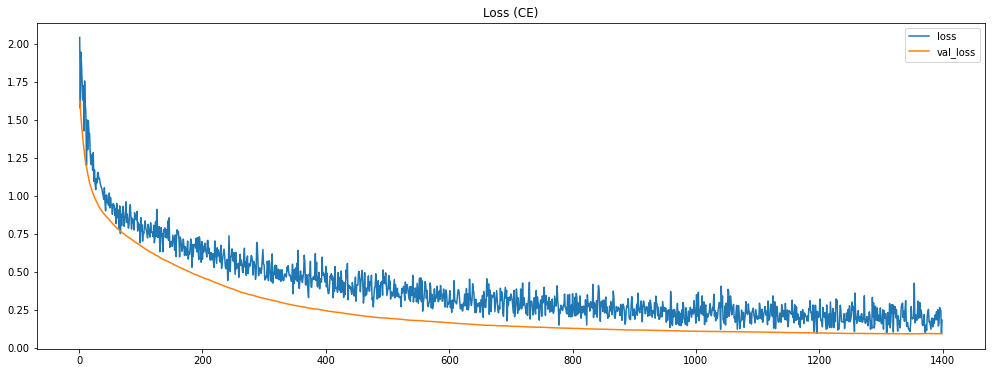

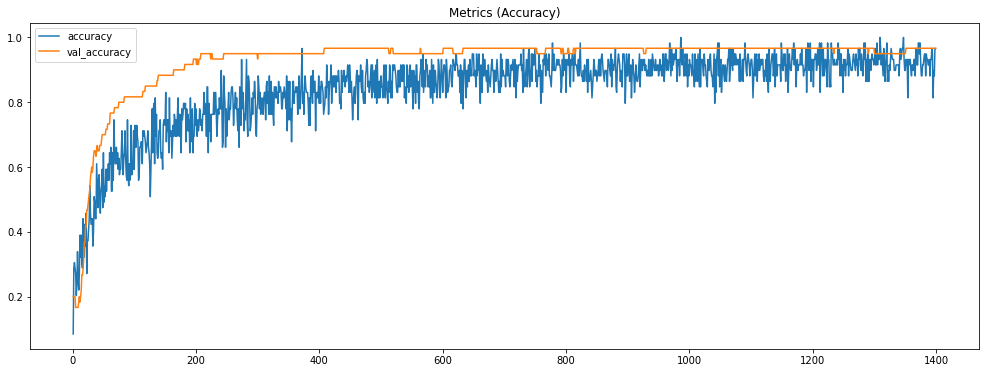

In [25]:
plt.rcParams['figure.figsize'] = (17, 6)
fig, ax1 = plt.subplots()
xepochs = range(1, len(log.history['loss']) + 1)

plt.plot(xepochs, log.history['loss'], label = 'loss')
plt.plot(xepochs, log.history['val_loss'], label = 'val_loss')
plt.title('Loss (CE)')
plt.legend()
plt.show()

plt.plot(xepochs, log.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, log.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [26]:
print('Train set:')
print_metrics(ohe.inverse_transform(y_train), model.predict_classes(x_train)[:,np.newaxis])

print()
print('Valid set:')
print_metrics(ohe.inverse_transform(y_valid), model.predict_classes(x_valid)[:,np.newaxis])

print()
print('Test set:')
print_metrics(ohe.inverse_transform(y_test), model.predict_classes(x_test)[:,np.newaxis])

Train set:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1-score : 1.00

Valid set:
Accuracy : 0.95
Precision: 0.95
Recall   : 0.95
F1-score : 0.95

Test set:
Accuracy : 0.98
Precision: 0.98
Recall   : 0.99
F1-score : 0.98


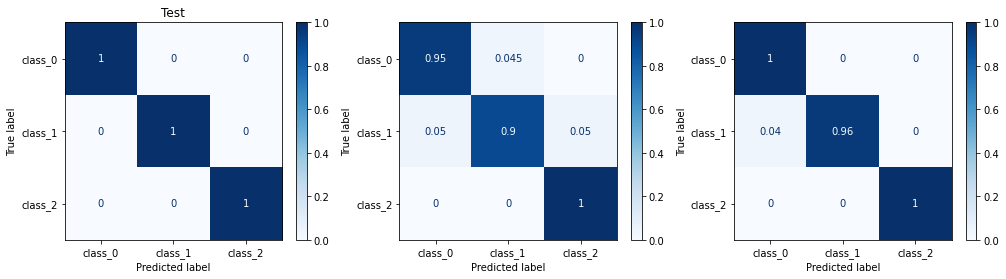

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 4))
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_train)), 
                  model.predict_classes(x_train), wine.target_names, ax1, 'Train')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_valid)), 
                  model.predict_classes(x_valid), wine.target_names, ax2, 'Valid')
print_conf_matrix(np.squeeze(ohe.inverse_transform(y_test)), 
                  model.predict_classes(x_test), wine.target_names, ax3, 'Test')
plt.show()